In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [35]:
A = pd.read_csv('Company A - Data.csv')

In [3]:
A.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
A = A.drop(['Unnamed: 0'],axis=1)

In [6]:
A["InternetService"].unique()

array(['No', 'Fiber optic', 'DSL'], dtype=object)

Text(0.5, 1.0, 'Churn Rate by Contract')

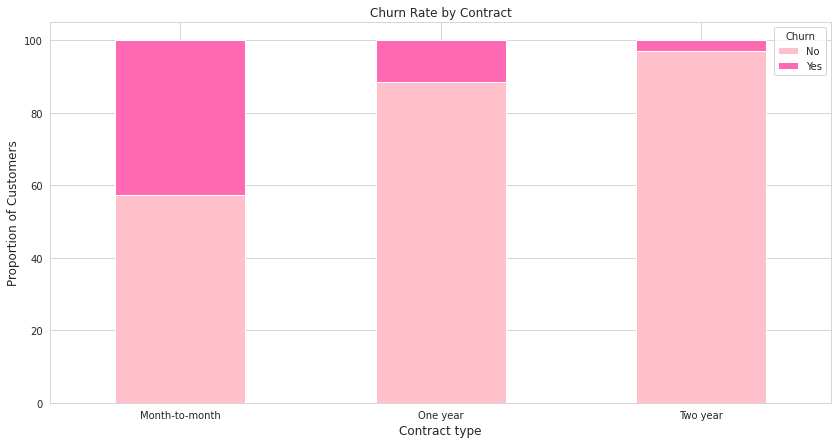

In [7]:
import matplotlib.ticker as mtick

contract_churn = A.groupby(['Contract','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,7),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('Contract type', fontsize = 'large')
plt.title('Churn Rate by Contract')

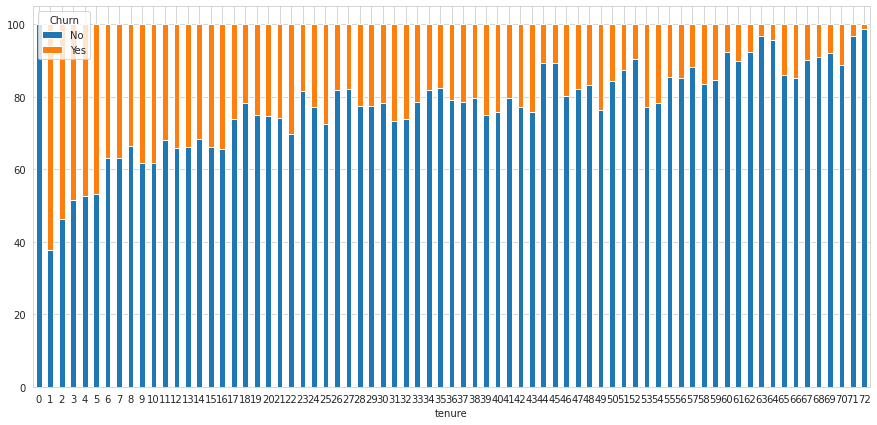

In [36]:
contract_churn = A.groupby(['tenure','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,7)
                                                                )

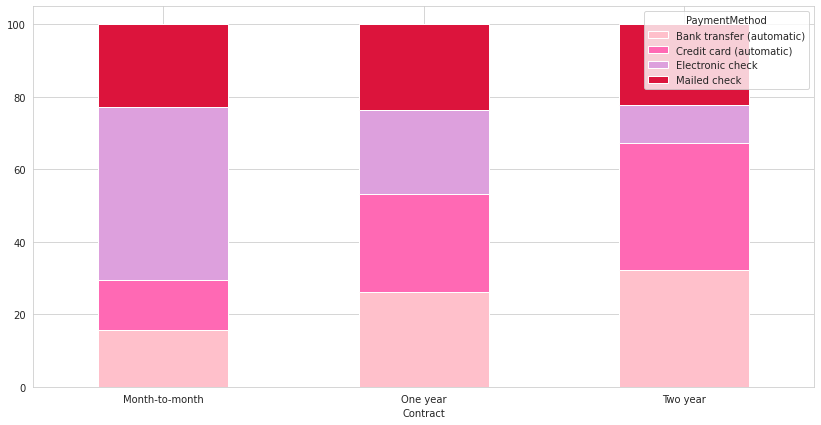

In [9]:
contract_churn = A.groupby(['Contract','PaymentMethod']).size().unstack()

colors  = ['pink','hotpink', 'plum', 'crimson']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,7),
                                                                color = colors)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
le = LabelEncoder()

le_count = 0
for col in A.columns[1:]:
    if A[col].dtype == 'object':
        if len(list(A[col].unique())) <= 2:
            le.fit(A[col])
            A[col] = le.transform(A[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [12]:
cust = A["customerID"]

data = A.drop(columns="customerID")
data= pd.get_dummies(data)
data = pd.concat([data, cust], axis = 1)

In [13]:
cust = data["Churn"]
data = data.drop(columns="Churn")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, cust,
                                                    stratify=cust, 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [15]:
train_id = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_id = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train1 = scaler.fit_transform(X_train)
train2 = scaler.fit_transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.metrics import f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

In [19]:
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [20]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.785476,0.621514,0.490566,0.54833


Text(33.0, 0.5, 'True')

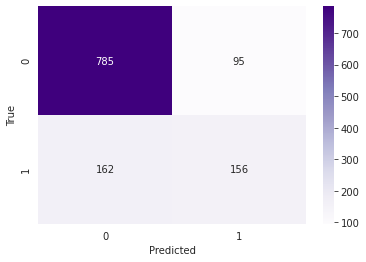

In [21]:
from sklearn import metrics
cnf_matrix = (metrics.confusion_matrix(y_test, y_pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, as_cmap=True)
sns.heatmap(cnf_matrix,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d", cmap= 'Purples')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(33.0, 0.5, 'True')

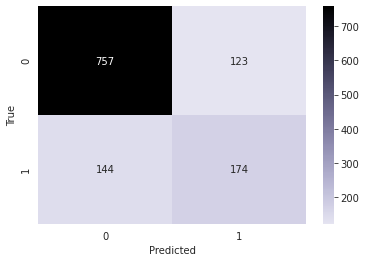

In [22]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
dec_tree= tree.fit(X_train, y_train)
tree_Pred = tree.predict(X_test).astype(int)

#Confusion Matrix 

from sklearn import metrics
cnf_matrix = (metrics.confusion_matrix(y_test, tree_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_matrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('True')

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score
acc = accuracy_score(y_test, tree_Pred )
prec = precision_score(y_test, tree_Pred )
rec = recall_score(y_test, tree_Pred )
f1 = f1_score(y_test, tree_Pred )

In [24]:
results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [25]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.777129,0.585859,0.54717,0.565854


In [26]:
from sklearn import feature_selection

In [27]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
32,Contract_Month-to-month,1.432282
1415,TotalCharges_20.2,1.044261
33,Contract_One year,0.765330
1318,TotalCharges_19.9,0.549245
3316,TotalCharges_45.7,0.531241
...,...,...
3253,TotalCharges_44.75,-0.357117
3240,TotalCharges_44,-0.387583
1790,TotalCharges_24.4,-0.458929
11,InternetService_DSL,-0.574974


In [28]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(tree.feature_importances_), columns = ["feature_importances_"])
           ],axis = 1)

feature_importances.sort_values("feature_importances_", ascending = False)

,features,feature_importances_
32,Contract_Month-to-month,0.532882
4,tenure,0.158372
12,InternetService_Fiber optic,0.097141
7,MonthlyCharges,0.071381
34,Contract_Two year,0.022946
...,...,...
1890,TotalCharges_25.75,0.000000
1889,TotalCharges_25.7,0.000000
1888,TotalCharges_25.4,0.000000
1887,TotalCharges_25.35,0.000000


# No1 reason for people churing using logistic regression is because they are on a month to month contract etc

In [29]:
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [30]:
final_results = pd.concat([test_id, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred 
final_results["Chance of conversion(%)"] = y_pred_probs 
final_results["Chance of conversion(%)"] = final_results["Chance of conversion(%)"]*100
final_results = final_results[['customerID', 'Churn', 'predictions', 'Chance of conversion(%)']]
print (final_results)

      customerID  Churn  predictions  Chance of conversion(%)
964   0897-FEGMU      1            1                82.501889
5576  9572-WUKSB      0            0                33.751508
121   6762-QVYJO      0            0                 0.151656
3887  9068-VPWQQ      0            0                 0.078266
529   3838-OZURD      1            0                27.816393
...          ...    ...          ...                      ...
4246  1169-WCVAK      0            0                20.263121
4508  9388-ZEYVT      0            0                11.116908
827   1097-FSPVW      0            0                 6.237515
5139  9938-ZREHM      0            0                 7.386854
2740  4614-NUVZD      1            1                77.625360

[1198 rows x 4 columns]


In [31]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [32]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[10:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:

preds = xgb.predict(X_test)

In [ ]:

feature_importance = xgb.feature_importances_


In [ ]:
feature_importance

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)